In [2]:
from keras.applications import MobileNetV2  # Using MobileNetV2 for a smaller model
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input


# Define new image dimensions (smaller size for faster training)
height = 224  # Reduced image size
width = 224   # Reduced image size

# Create a MobileNetV2 model instance without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Define directories for training and validation data
train_dir = "C:\\Users\\avant\\OneDrive\\Desktop\\FakeCurrencyDetectionSystem-master\\FakeCurrencyDetectionSystem-master\\Dataset\\Training"
validation_dir = "C:\\Users\\avant\\OneDrive\\Desktop\\FakeCurrencyDetectionSystem-master\\FakeCurrencyDetectionSystem-master\\Dataset\\Validation"

# Number of batches per training step
batch_size = 8

# Create data generators for training and validation data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90, horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height, width), batch_size=batch_size)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90, horizontal_flip=True, vertical_flip=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width), batch_size=batch_size)

# Define the new finetune model with smaller FC layers and no dropout
def build_finetune_model(base_model, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)  # Reduced fully connected layers
        # x = Dropout(0.5)(x)  # Optionally remove dropout for reduced model size
    
    predictions = Dense(num_classes, activation='softmax')(x)

    finetune_model = Model(inputs=base_model.input, outputs=predictions) 
    return finetune_model

# New configuration for fully connected layers (smaller number of neurons)
FC_Layers = [512]  # Reduced number of neurons in fully connected layer
dropout = 0.3  # Lower dropout rate

# Initialize the finetuned model
finetune_model = build_finetune_model(base_model, fc_layers=FC_Layers, num_classes=2)

# Model compilation with reduced learning rate
finetune_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=['accuracy'])

# Callbacks for saving best model and early stopping
checkpoint = ModelCheckpoint("Final_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode="auto")

# Train the model
finetune_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=50,  # Reduced number of epochs for faster training
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // batch_size,
    callbacks=[checkpoint, early]
)

# Save the final model
finetune_model.save("Final_model.h5")


Found 35 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


C:\Users\avant\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.5566 - loss: 0.9137
Epoch 1: val_accuracy improved from -inf to 0.85714, saving model to Final_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5305 - loss: 0.9967 - val_accuracy: 0.8571 - val_loss: 0.5629
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.6780 - loss: 0.8024
Epoch 2: val_accuracy did not improve from 0.85714
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 0.6698 - loss: 0.8702 - val_accuracy: 0.7143 - val_loss: 1.2936
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6570 - loss: 0.7725
Epoch 3: val_accuracy did not improve from 0.85714
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.6523 - loss: 0.7999 - val_accuracy: 0.8571 - val_loss: 0.5006
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7782 - loss: 0.6072
Epoch 4: val_accuracy did not improve from 0.85714
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.7866 - loss: 0.5882 - val_accuracy: 0.4286 - val_loss: 1.0190
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8204 - loss: 0.5542
Epoch 5: val_accuracy improved from 0.85714 to 1.0000

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - accuracy: 0.8170 - loss: 0.5420 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8386 - loss: 0.2793
Epoch 6: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 0.8370 - loss: 0.3074 - val_accuracy: 1.0000 - val_loss: 0.0754
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8739 - loss: 0.5082
Epoch 7: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 0.8711 - loss: 0.5159 - val_accuracy: 0.7143 - val_loss: 1.6359
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.9065 - loss: 0.2965
Epoch 8: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 518ms/step - accuracy: 0.9078 - loss: 0.3042 - val_accuracy: 1.0000 - val_loss: 0.0965
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.7963 - loss: 0.3435
Epoch 9: val_accuracy did not improve from 1.00000


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


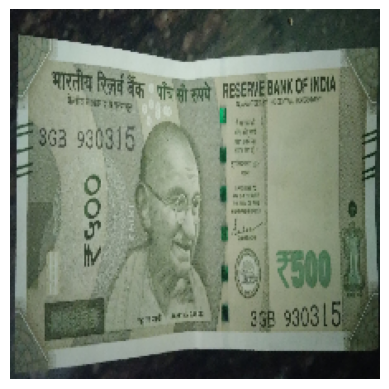

Real


In [4]:
from tensorflow.keras.preprocessing import image  # Correct import for load_img
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img = image.load_img("Dataset/Testing/Real.jpg", target_size=(224, 224))  # Resize to (224, 224)
img = np.asarray(img)

# Normalize if necessary (assuming model was trained with normalized images)
img = img / 255.0  # Normalize pixel values to [0, 1]

# Expand dimensions to match the input format (batch size, height, width, channels)
img = np.expand_dims(img, axis=0)

# Load model weights
finetune_model.load_weights("Final_model.h5")

# Predict the class of the image
output = finetune_model.predict(img)

# Display the image
plt.imshow(img[0])
plt.axis('off')  # Hide axis
plt.show()

# Check which class the model predicts
if output[0][0] > output[0][1]:  # Assuming output[0][0] is "Fake" and output[0][1] is "Real"
    print("Fake")
else:
    print("Real")


In [6]:
import pickle
from tensorflow.keras.models import load_model  # Import load_model

# Load the saved .h5 model
model = load_model("Final_model.h5")

# Save the model using pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
